In [27]:
#!pip install calour
!pip install git+git://github.com/biocore/calour.git


  Cloning git://github.com/biocore/calour.git to /tmp/pip-req-build-4bqvbi1u
  Running command git clone -q git://github.com/biocore/calour.git /tmp/pip-req-build-4bqvbi1u
  Created wheel for calour: filename=calour-2019.5.1-cp36-none-any.whl size=107077 sha256=07e502ba588a2357dd22ae842cfeec843cc4521d678d61c47641812997e9656c
  Stored in directory: /tmp/pip-ephem-wheel-cache-3rumtsgq/wheels/f8/01/c8/3d44c8cd60461f30ac0e7c1db248da9dc3f1c76c3d6e51ce0f
Successfully built calour
  Found existing installation: calour 2018.5.1
    Uninstalling calour-2018.5.1:
      Successfully uninstalled calour-2018.5.1


In [0]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from calour.training import plot_scatter, plot_roc, plot_cm

In [0]:
import calour as ca
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [8, 8]

In [0]:
#%matplotlib notebook

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
dat = ca.read_amplicon('/content/drive/My Drive/Colab Notebooks/data/cfs.biom','/content/drive/My Drive/Colab Notebooks/data/cfs.map.txt',normalize=10000,min_reads=1000)

2019-12-01 14:01:37 WARNING These have metadata but do not have data - dropped: {'ERR1331814'}


In [0]:
dat = dat.filter_abundance(10)

In [36]:
print(dat)

AmpliconExperiment ("cfs.biom") with 87 samples, 1100 features


In [37]:
dat.sample_metadata['Subject'].value_counts()

Patient    48
Control    39
Name: Subject, dtype: int64

In [0]:
it = dat.classify('Subject', RandomForestClassifier(random_state=0), cv=RepeatedStratifiedKFold(5, 3), params=[{'n_estimators':3}, {'n_estimators': 500}])

In [0]:
res1 = next(it)

In [40]:
res1.head()

Control   Patient   Y_TRUE      SAMPLE  CV
0  0.666667  0.333333  Patient  ERR1331812   0
1  0.666667  0.333333  Patient  ERR1331815   0
2  0.000000  1.000000  Patient  ERR1331870   0
3  0.666667  0.333333  Control  ERR1331820   0
4  0.000000  1.000000  Control  ERR1331827   0

In [41]:
#ca.training.plot_roc(res1, classes = ['Patient']) #please try this one !
ca.training.plot_roc(result = res1)

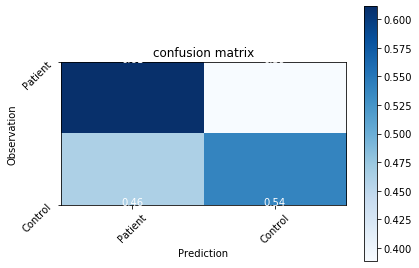

In [59]:
%matplotlib inline
#import matplotlib.pyplot as plt     

plot_cm(res1, normalize=True)

In [0]:
res2 = next(it)

In [44]:
res2.head()

Control  Patient   Y_TRUE      SAMPLE  CV
0    0.654    0.346  Control  ERR1331836   0
1    0.166    0.834  Patient  ERR1331791   0
2    0.240    0.760  Control  ERR1331842   0
3    0.474    0.526  Patient  ERR1331797   0
4    0.198    0.802  Patient  ERR1331839   0

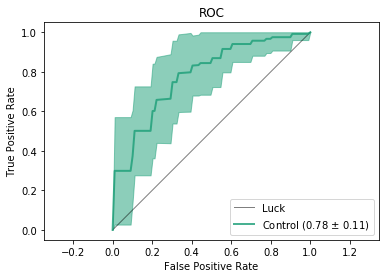

In [47]:
plot_roc(res2)#, classes=['Patient'])

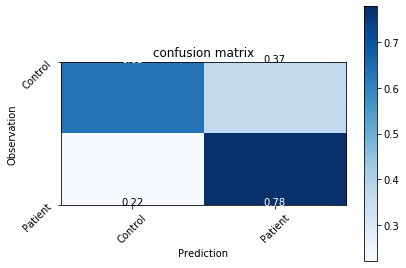

In [48]:
ca.training.plot_cm(res2, normalize=True)